In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

from k_means import KMeans
from k_medoids import KMedoids
from dbscan import DBSCAN
from hierarchical import AgglomerativeClustering

In [38]:
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

def plot_comparison(description, X, label_sets, label_titles=None, centroids_list=None):
    num_plots = len(label_sets)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
    if num_plots == 1:
        axes = [axes]

    for idx, (ax, labels) in enumerate(zip(axes, label_sets)):
        has_noise = np.any(labels == -1)

        for i in range(X.shape[0]):
            label = labels[i]
            if label == -1:
                ax.scatter(X[i, 0], X[i, 1], color='gray', marker='x')
            else:
                ax.scatter(X[i, 0], X[i, 1], color=cluster_colors[label % len(cluster_colors)], marker='o')

        if centroids_list and centroids_list[idx] is not None:
            centroids = centroids_list[idx]
            ax.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*', s=150, label='Centroid')

        if has_noise:
            ax.scatter([], [], color='gray', marker='x', label='Noise')
            ax.legend()

        if label_titles:
            ax.set_title(label_titles[idx])
        else:
            ax.set_title(f'Labels {idx+1}')

        ax.grid(True)

    fig.suptitle(description)
    plt.tight_layout()
    plt.show()




In [15]:
test_blobs_X, test_blobs_labels = make_blobs(n_samples=300, centers=4, random_state=2)

test_circles_X, test_circles_labels = make_circles(n_samples=300, factor=0.5, noise=0.05)

test_moons_X, test_moons_labels = make_moons(n_samples=300, noise=0.05)

# 1. K-means

⏱️  Custom KMeans time:   0.0016 seconds
⏱️  Sklearn KMeans time:  0.0029 seconds
📊  ARI (My vs True):     0.9321
📊  ARI (Sklearn vs True):0.9321
📊  ARI (My vs Sklearn):  1.0000


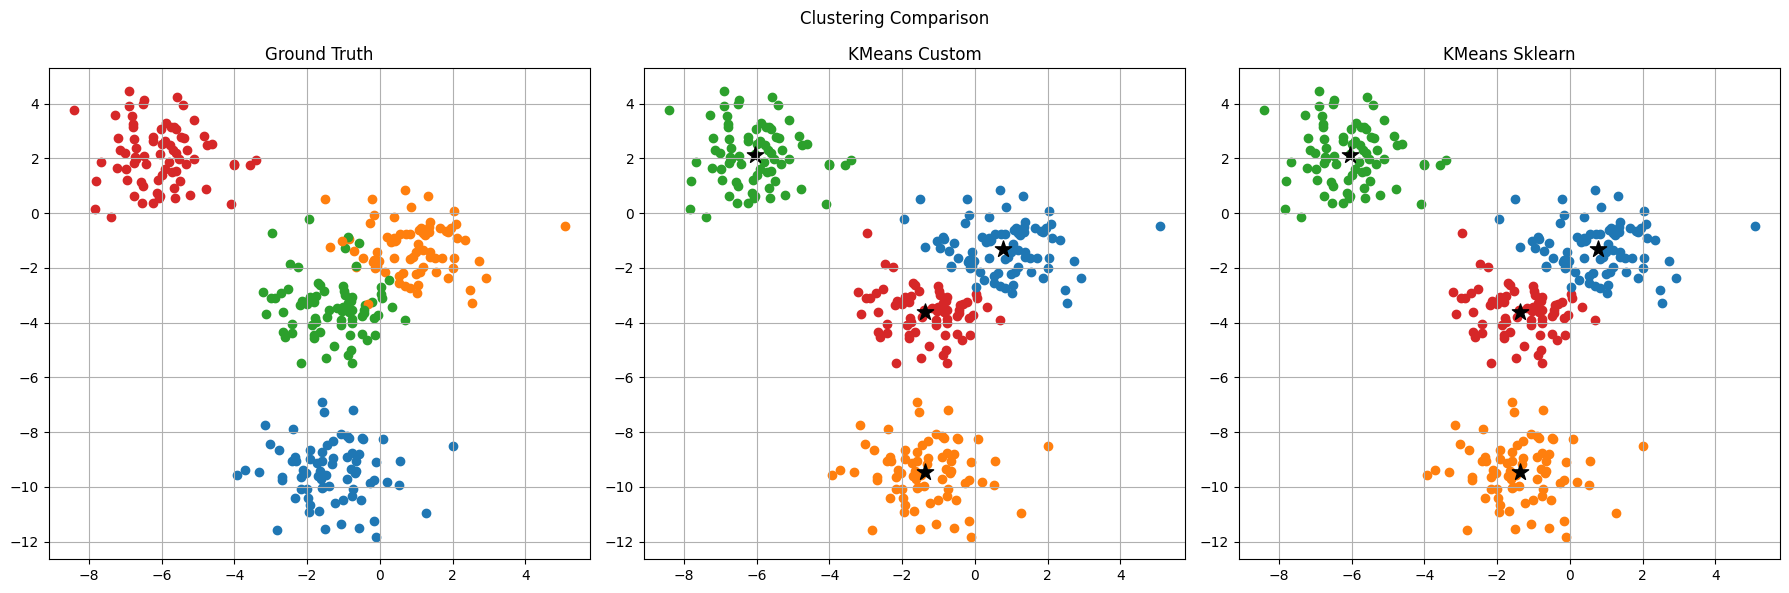

⏱️  Custom KMeans time:   0.0011 seconds
⏱️  Sklearn KMeans time:  0.0015 seconds
📊  ARI (My vs True):     -0.0033
📊  ARI (Sklearn vs True):-0.0029
📊  ARI (My vs Sklearn):  0.4790


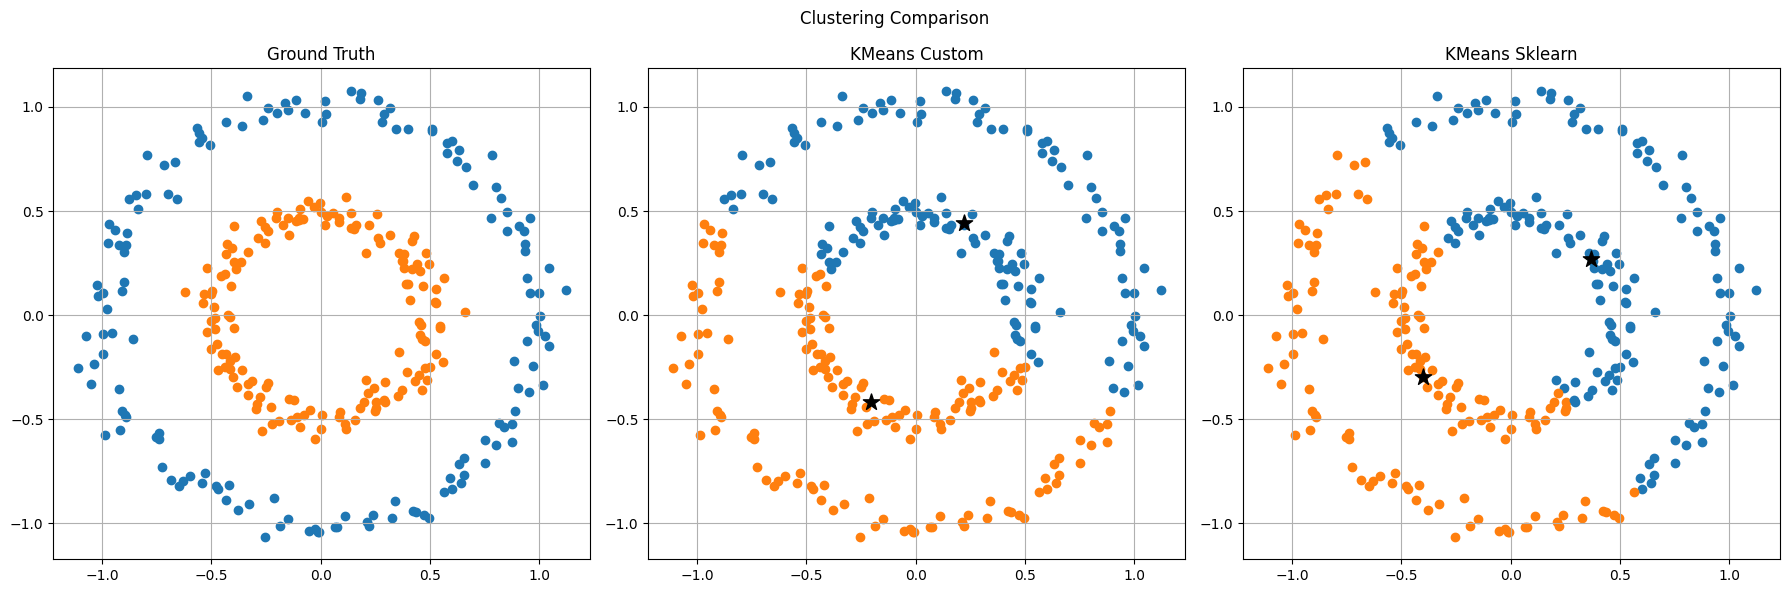

⏱️  Custom KMeans time:   0.0010 seconds
⏱️  Sklearn KMeans time:  0.0016 seconds
📊  ARI (My vs True):     0.2475
📊  ARI (Sklearn vs True):0.2542
📊  ARI (My vs Sklearn):  0.9867


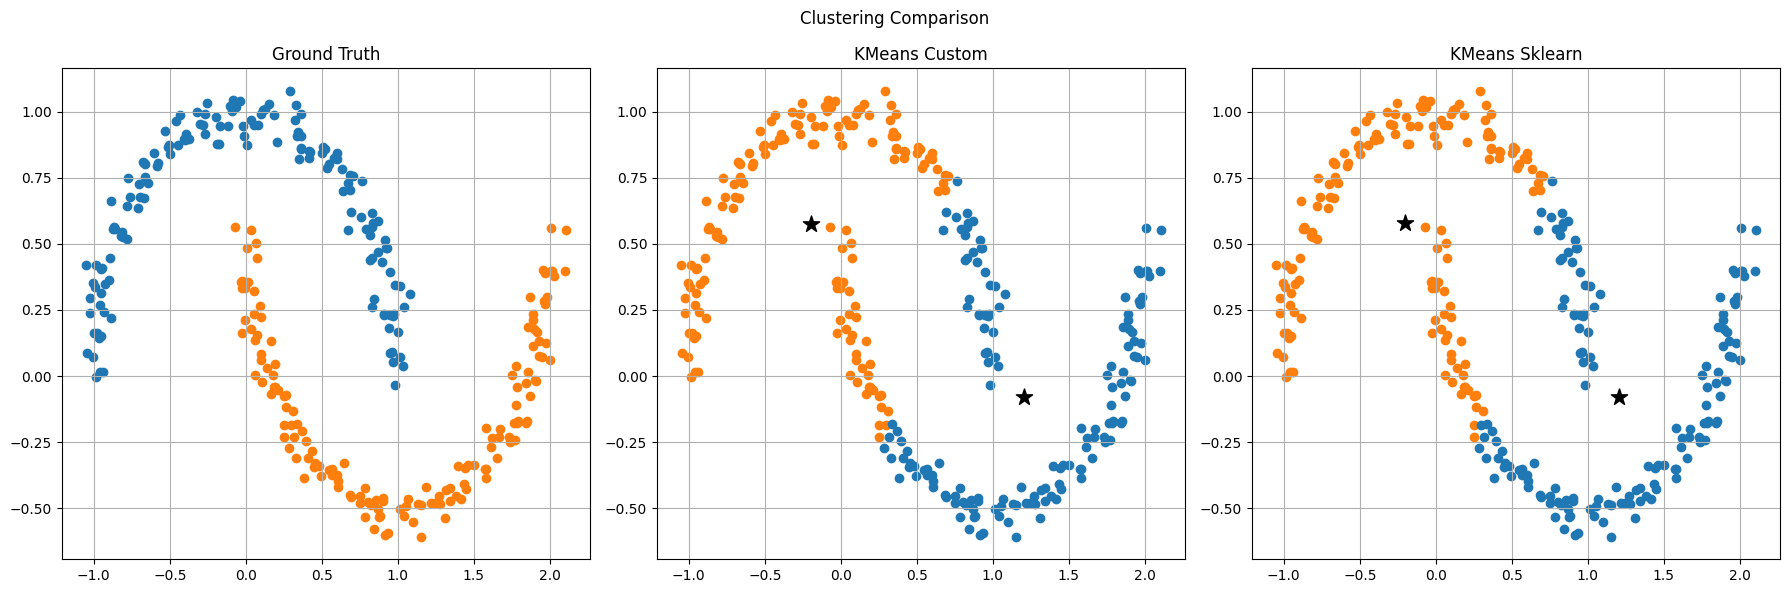

In [20]:
from sklearn.cluster import KMeans as KMeans_sklearn
from sklearn.metrics import adjusted_rand_score
import time

def test_k_means(X, true_Y, n_clusters):
    start_my = time.time()
    kmeans_my = KMeans(n_clusters=n_clusters, random_state=421)
    labels_my, centroids_my = kmeans_my.fit(X)
    end_my = time.time()

    start_sklearn = time.time()
    kmeans = KMeans_sklearn(n_clusters=n_clusters, random_state=421, n_init="auto").fit(X)
    end_sklearn = time.time()

    ari_my_vs_true = adjusted_rand_score(true_Y, labels_my)
    ari_sklearn_vs_true = adjusted_rand_score(true_Y, kmeans.labels_)
    ari_my_vs_sklearn = adjusted_rand_score(labels_my, kmeans.labels_)

    print(f"⏱️  Custom KMeans time:   {end_my - start_my:.4f} seconds")
    print(f"⏱️  Sklearn KMeans time:  {end_sklearn - start_sklearn:.4f} seconds")
    print(f"📊  ARI (My vs True):     {ari_my_vs_true:.4f}")
    print(f"📊  ARI (Sklearn vs True):{ari_sklearn_vs_true:.4f}")
    print(f"📊  ARI (My vs Sklearn):  {ari_my_vs_sklearn:.4f}")

    plot_comparison(
        'Clustering Comparison',
        X=X,
        label_sets=[true_Y, labels_my, kmeans.labels_],
        label_titles=["Ground Truth", "KMeans Custom", "KMeans Sklearn"],
        centroids_list=[None, centroids_my, kmeans.cluster_centers_]
    )

test_k_means(test_blobs_X, test_blobs_labels, n_clusters=4)
test_k_means(test_circles_X, test_circles_labels, n_clusters=2)
test_k_means(test_moons_X, test_moons_labels, n_clusters=2)

# 2. K-medoids

⏱️  Custom KMedoids time:   0.0076 seconds
📊  ARI (My vs True):     0.9320


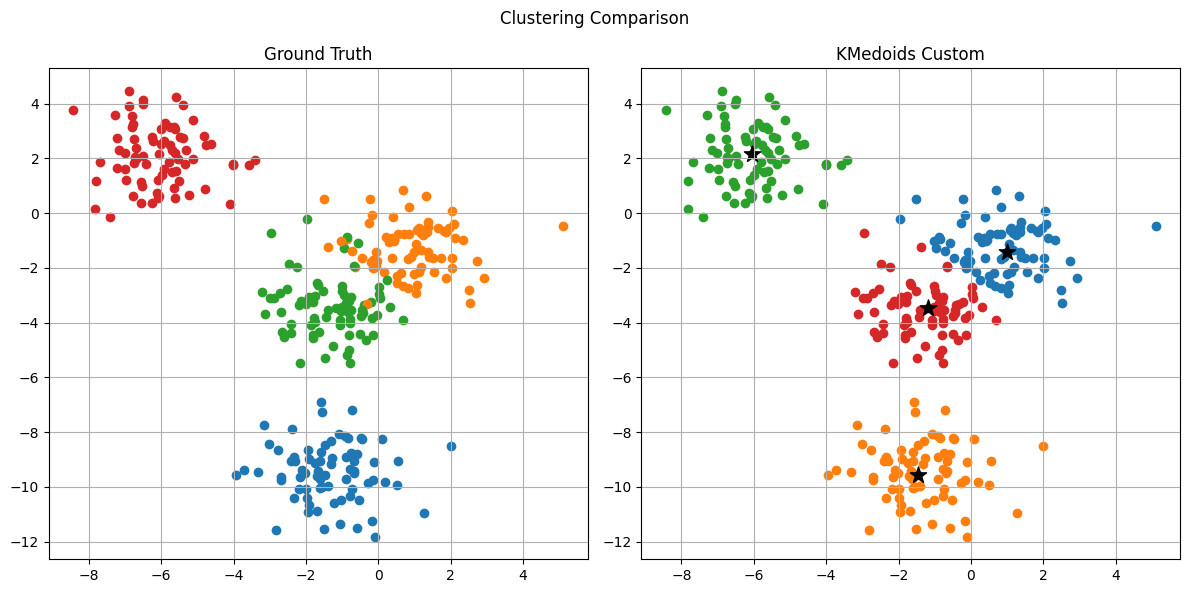

⏱️  Custom KMedoids time:   0.0100 seconds
📊  ARI (My vs True):     -0.0032


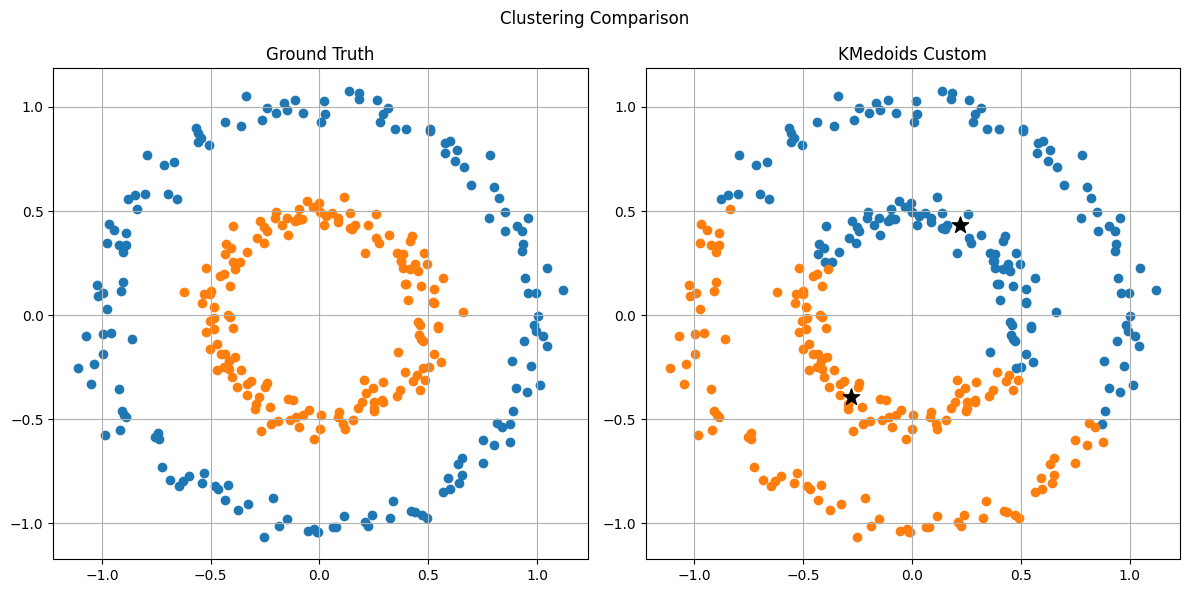

⏱️  Custom KMedoids time:   0.0085 seconds
📊  ARI (My vs True):     0.2965


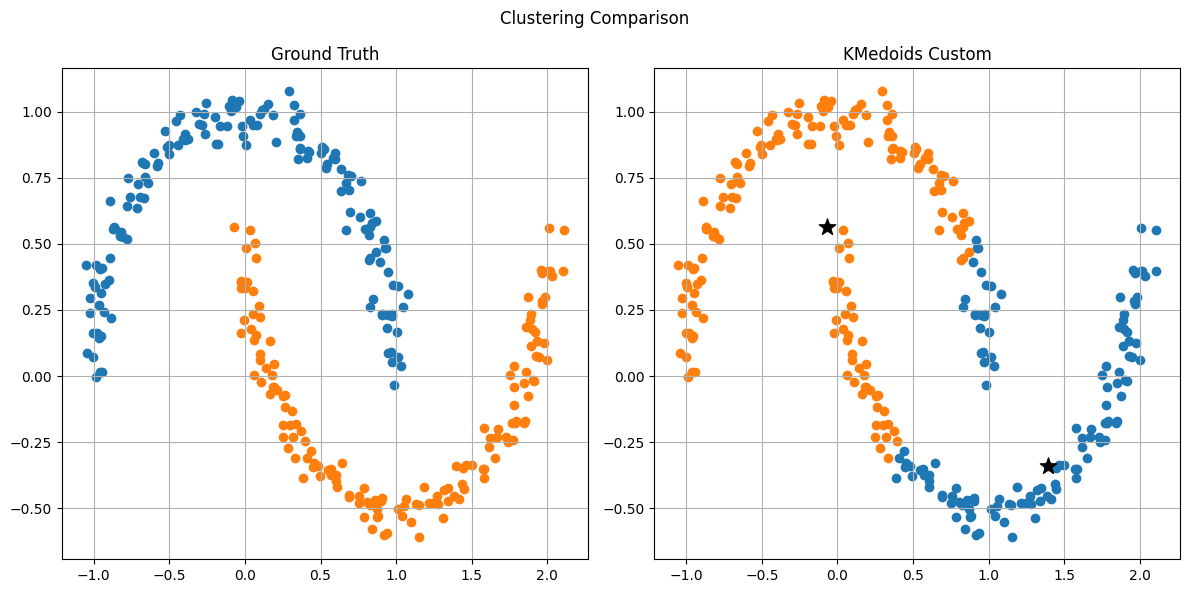

In [23]:
from sklearn.metrics import adjusted_rand_score
import time

def test_k_medoids(X, Y_true, n_clusters):
    start_my = time.time()
    kmedoids_my = KMedoids(n_clusters=n_clusters, random_state=421)
    labels_my, centroids_my = kmedoids_my.fit(X)
    end_my = time.time()

    ari_my_vs_true = adjusted_rand_score(Y_true, labels_my)

    print(f"⏱️  Custom KMedoids time:   {end_my - start_my:.4f} seconds")
    print(f"📊  ARI (My vs True):     {ari_my_vs_true:.4f}")

    plot_comparison(
        'Clustering Comparison',
        X=X,
        label_sets=[Y_true, labels_my],
        label_titles=["Ground Truth", "KMedoids Custom"],
        centroids_list=[None, centroids_my]
    )

test_k_medoids(test_blobs_X, test_blobs_labels, n_clusters=4)
test_k_medoids(test_circles_X, test_circles_labels, n_clusters=2)
test_k_medoids(test_moons_X, test_moons_labels, n_clusters=2)

# 3. DBSCAN

⏱️  Custom DBSCAN time:   0.2436 seconds
⏱️  Sklearn DBSCAN time:  0.0021 seconds
📊  ARI (My vs True):     0.6151
📊  ARI (Sklearn vs True):0.6151
📊  ARI (My vs Sklearn):  1.0000


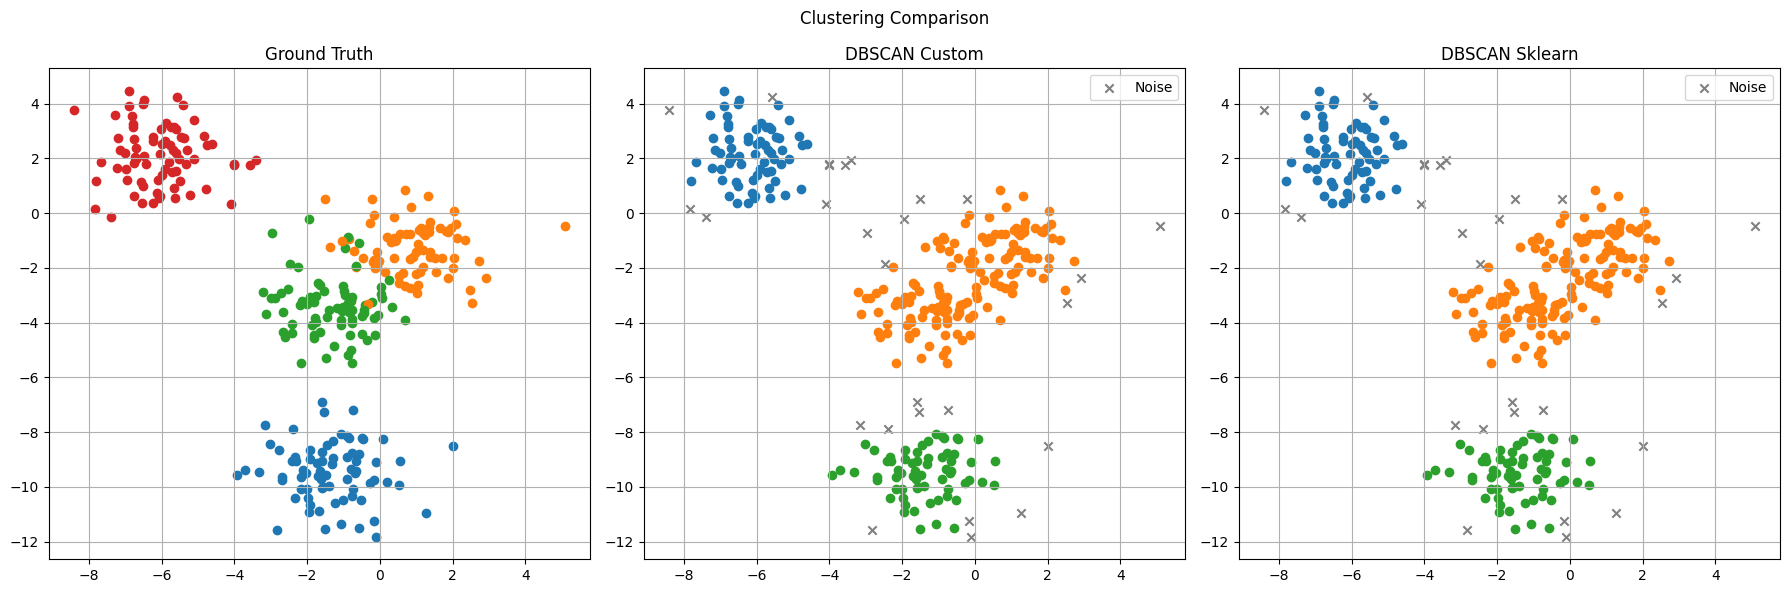

⏱️  Custom DBSCAN time:   0.2238 seconds
⏱️  Sklearn DBSCAN time:  0.0019 seconds
📊  ARI (My vs True):     1.0000
📊  ARI (Sklearn vs True):1.0000
📊  ARI (My vs Sklearn):  1.0000


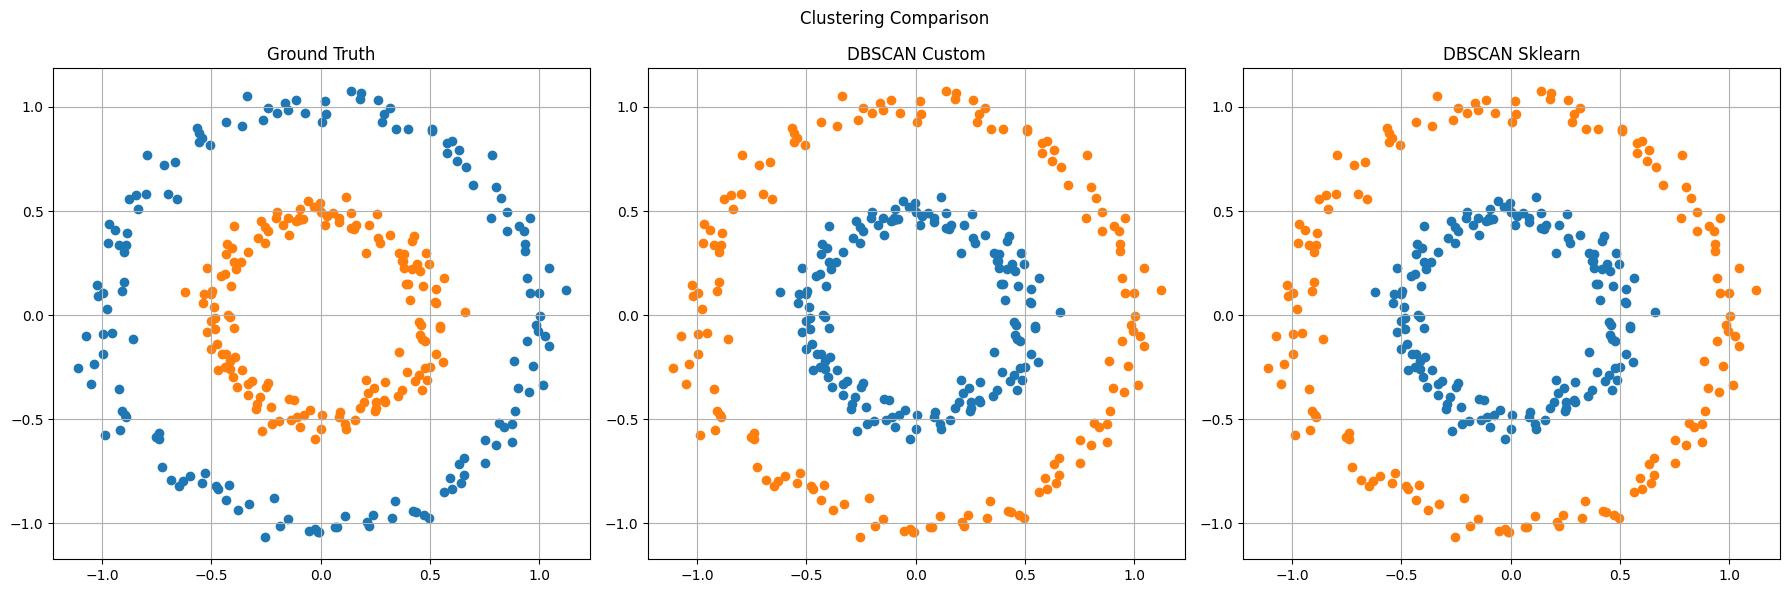

⏱️  Custom DBSCAN time:   0.2377 seconds
⏱️  Sklearn DBSCAN time:  0.0021 seconds
📊  ARI (My vs True):     1.0000
📊  ARI (Sklearn vs True):1.0000
📊  ARI (My vs Sklearn):  1.0000


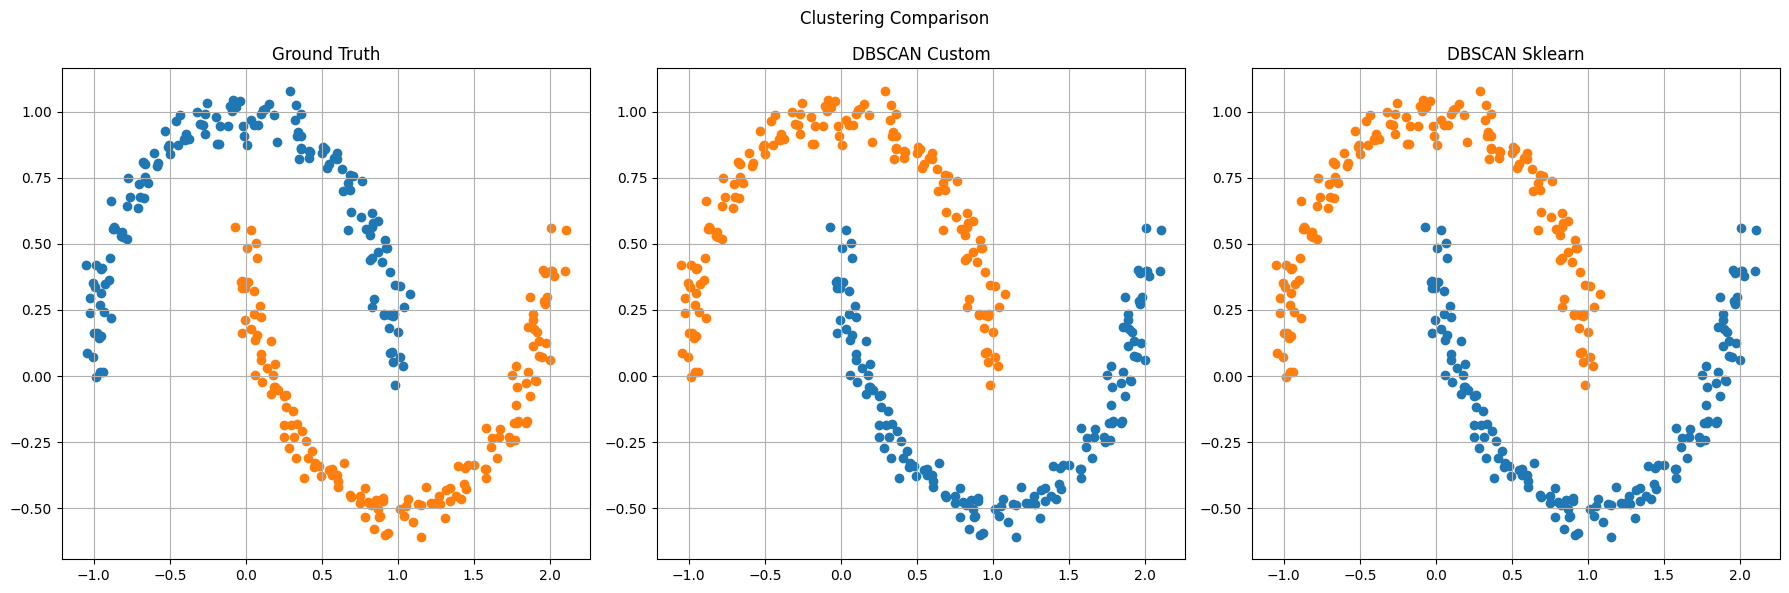

In [37]:
from sklearn.cluster import DBSCAN as DBSCAN_sklearn
from sklearn.metrics import adjusted_rand_score
import time

def test_dbscan(X, Y_true, eps=0.5):
    start_my = time.time()
    dbscan_my = DBSCAN(eps=eps)
    labels_my = dbscan_my.fit(X)
    end_my = time.time()
    labels_my

    start_sklearn = time.time()
    dbscan = DBSCAN_sklearn(eps=eps).fit(X)
    end_sklearn = time.time()

    ari_my_vs_true = adjusted_rand_score(Y_true, labels_my)
    ari_sklearn_vs_true = adjusted_rand_score(Y_true, dbscan.labels_)
    ari_my_vs_sklearn = adjusted_rand_score(labels_my, dbscan.labels_)

    print(f"⏱️  Custom DBSCAN time:   {end_my - start_my:.4f} seconds")
    print(f"⏱️  Sklearn DBSCAN time:  {end_sklearn - start_sklearn:.4f} seconds")
    print(f"📊  ARI (My vs True):     {ari_my_vs_true:.4f}")
    print(f"📊  ARI (Sklearn vs True):{ari_sklearn_vs_true:.4f}")
    print(f"📊  ARI (My vs Sklearn):  {ari_my_vs_sklearn:.4f}")

    plot_comparison(
        'Clustering Comparison',
        X=X,
        label_sets=[Y_true, labels_my, dbscan.labels_],
        label_titles=["Ground Truth", "DBSCAN Custom", "DBSCAN Sklearn"],
        centroids_list=[None, None, None]
    )

test_dbscan(test_blobs_X, test_blobs_labels, eps=0.8)
test_dbscan(test_circles_X, test_circles_labels, eps=0.2)
test_dbscan(test_moons_X, test_moons_labels, eps=0.2)

# 4. Agglomerative clustering

📊  ARI (My vs True):     0.3311


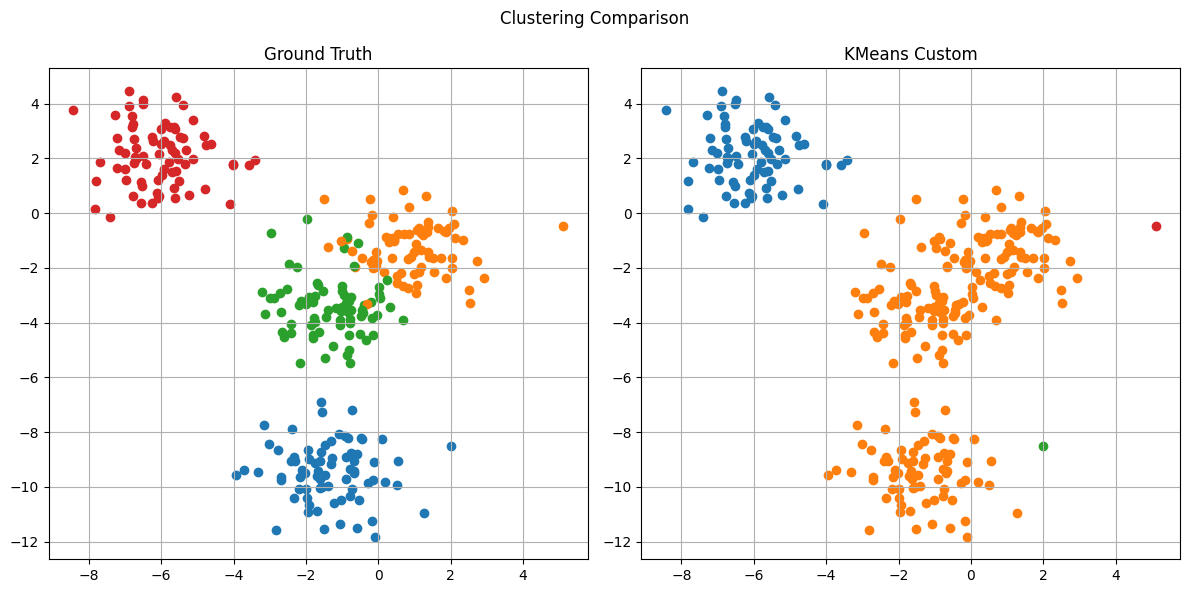

In [14]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering as AgglSklearn 
from sklearn.metrics import adjusted_rand_score
import time

start_my = time.time()
agglomerative_my = AgglomerativeClustering(n_clusters=4, linkage='single')
labels_my = agglomerative_my.fit(test_blobs_X)
end_my = time.time()

# dendrogram(linkage_matrix)

ari_my_vs_true = adjusted_rand_score(test_blobs_labels, labels_my)

print(f"📊  ARI (My vs True):     {ari_my_vs_true:.4f}")

plot_comparison(
    'Clustering Comparison',
    X=test_blobs_X,
    label_sets=[test_blobs_labels, labels_my],
    label_titles=["Ground Truth", "KMeans Custom", "KMeans Sklearn"],
    centroids_list=[None, None, None]
)


## 📊 Додатковий аналіз алгоритмів кластеризації

Тепер проведемо більш глибокий аналіз та порівняємо алгоритми кластеризації з використанням таких метрик:

- **Silhouette Score** – визначає, наскільки добре кластери відокремлені один від одного.
- **Calinski-Harabasz Index** – співвідношення між внутрішньокластерною дисперсією та дисперсією між кластерами.
- **Davies-Bouldin Index** – середня міра схожості між кожним кластером та його найближчим сусідом (чим менше, тим краще).


In [ ]:

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Словники для збереження метрик
silhouette_scores = {}
calinski_scores = {}
davies_scores = {}

# Обчислення метрик
for name, algorithm in clustering_algorithms.items():
    y_pred = algorithm.fit_predict(X)
    silhouette_scores[name] = silhouette_score(X, y_pred)
    calinski_scores[name] = calinski_harabasz_score(X, y_pred)
    davies_scores[name] = davies_bouldin_score(X, y_pred)

# Графіки порівняння
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
axes[0].set_title('Silhouette Score')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(calinski_scores.keys(), calinski_scores.values(), color='lightgreen')
axes[1].set_title('Calinski-Harabasz Index')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(davies_scores.keys(), davies_scores.values(), color='salmon')
axes[2].set_title('Davies-Bouldin Index (lower is better)')
axes[2].set_ylabel('Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



## 📝 Висновки після аналізу:

На основі проведених розрахунків метрик можна зробити такі висновки:

- **Silhouette Score** дає зрозуміти, які алгоритми формують найбільш чіткі кластери.
- **Calinski-Harabasz Index** показує, наскільки алгоритми здатні створювати добре відокремлені кластери.
- **Davies-Bouldin Index** демонструє, наскільки добре кластери розмежовані (чим нижче значення, тим краще).

Завдяки цим графікам легко визначити найбільш ефективні алгоритми для конкретного набору даних.
